In [23]:
import pandas as pd
from regiotool import partitioning 

In [28]:
zones = pd.read_pickle('example/ecodemo_NUTS1.pkl')
attributes = ['density', 'gdp_inhabitant', 'median_age', 'rate_migration']
k=5
result = partitioning(k, zones, attributes)
print(result.global_heterogeneity)
print(result.regions)

3.62290927
[[0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 51, 52, 53, 54, 55, 62, 63, 64, 65], [34, 35, 45, 46, 47, 48, 49, 50, 56, 57, 58, 59, 60, 61, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 84, 88], [78, 81, 82, 83, 85, 86], [87, 89, 90, 91, 92, 93]]


In [26]:
import geopandas as gpd
import distinctipy as dpy

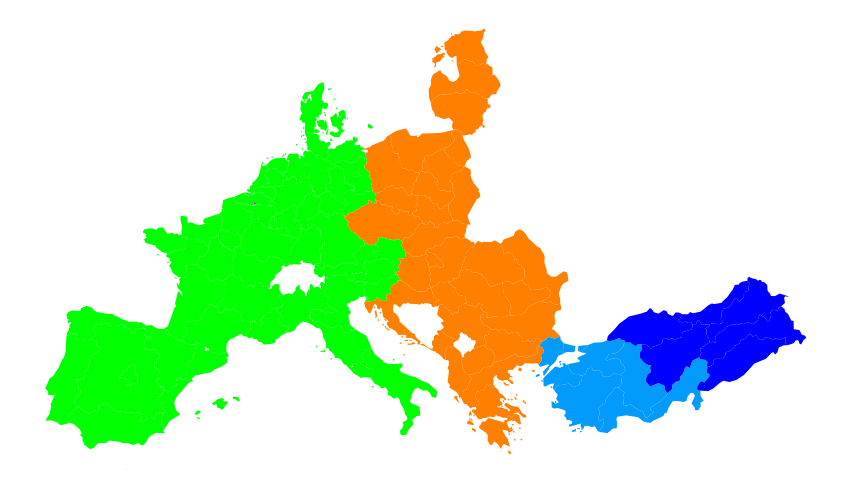

In [27]:
colors = dpy.get_colors(k)
colors = ['#%02x%02x%02x' % tuple([int(i*255) for i in j]) for j in colors]
gdf = gpd.read_file('example/NUTS_RG_20M_2021_3035.shp').set_index('NUTS_ID')
gdf = gdf.loc[zones['NUTS_ID']]
gdf['colors'] = None
for i,r in enumerate(result.regions):
    for z in r:
        gdf.loc[zones.loc[z,'NUTS_ID'], 'colors'] = colors[i]
ax = gdf.plot(figsize=(15, 10),color=gdf['colors'])
ax.set_axis_off()